In [1]:

from scipy.interpolate import griddata

import matplotlib.pyplot  as plt

from matplotlib import cm
from collections import OrderedDict
from colorspacious import cspace_converter
cmaps=OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
    
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

###Les données 

import tensorflow as tf
import numpy as np
import scipy.io
import time
import sys
import os
from tensorflow import keras







path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/run_200_450_piv0.mat'
#path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/data_pas_1_23_04.mat'
def data_regression_rho(path_data,t1,t2,proportion):
    data = scipy.io.loadmat(path_data)
    t_star = data['t'].reshape([-1,1])[t1:t2]# T x 1
    x_star = data['x'][:,t1:t2] # N x 1
    y_star = data['y'][:,t1:t2] # N x 1

    
    T = t_star.shape[0]
    N = x_star.shape[0]
    Rho_star = data['Densite'][:,t1:t2]
    T_star = np.tile(t_star, (1,N)).T
    X_star = x_star 
    Y_star = y_star 
    T_data = T # int(sys.argv[1])
    N_data = N # int(sys.argv[2])
    ind_t = np.random.randint(T_data,size = T_data)
    ind_x = np.random.randint(N_data, size = int(N_data*proportion))
    print(ind_t.shape)
    t_data = T_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    x_data = X_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    y_data = Y_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    rho_data = Rho_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    print(rho_data.shape)
    return t_data,x_data,y_data,rho_data

t_data, x_data, y_data, rho_data = data_regression_rho(path_data,0,300,0.25)
inp_grad=np.concatenate([x_data,y_data,t_data],1)
inp_train = inp_grad

data_X = [inp_grad,inp_train]
data_Y = [rho_data]

(240,)
(612000, 1)


In [2]:
##Validation 

N_train = inp_grad.shape[0]
path_v = '/media/delcey1/Elements/these/Re 2000/datafiltre_piv_01.mat'
dens_v = scipy.io.loadmat(path_v)

t_star = data['t'].reshape([-1,1])[0:] # T x 1
x_star = data['x'].reshape([-1,1]) # N x 1
y_star = data['y'].reshape([-1,1]) # N x 1



T = t_star.shape[0]
N = x_star.shape[0]
    
    # Rearrange Data 
T_star = np.tile(t_star, (1,N)).T # N x T
X_star = np.tile(x_star, (1,T)) # N x T
Y_star = np.tile(y_star, (1,T)) # N x T


t_valid = T_star.flatten().reshape(-1,1)
x_valid = X_star.flatten().reshape(-1,1)
y_valid = Y_star.flatten().reshape(-1,1)

N_v = t_valid.shape[0]
N_valid = int(N_train*0.10)
indv = np.random.randint(N_v,size = N_valid)


t_valid = t_valid[indv]
x_valid = x_valid[indv]
y_valid = y_valid[indv]


NameError: name 'data' is not defined

In [2]:
data_Y[0].shape


(2302950, 1)

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa

In [2]:

class HFM_keras(tf.keras.Model):
    
    def __init__(self,num_layers,num_units,alpha=1,lr_star = 1e-3,mod_rho_path=None,mod_uv_path=None,mod_p_path=None):
 

        
        super(HFM_keras, self).__init__()
        
        visc=1e-3 
        eta = 1e-9
        g=9.81
        rho_0=999.4
        ##Les constantes
        self.visc = visc
        self.eta = eta
        self.g = g 
        self.rho_0 = rho_0
        self.grad_input = None
        self.alpha = alpha
        self.lr = lr_start
        
        
        ##paths 
        self.mod_rho_path = mod_rho_path
        self.mod_uv_path = mod_uv_path
        self.mod_p_path = mod_p_path
        
        #Le réseau
        self.num_units = num_units
        self.num_layers = num_layers
        self.layers_rho = []
        self.layers_uv = []
        self.layers_p = []

        
        num_layer_rho = num_layers['rho']
        num_layer_uv= num_layers['uv']
        num_layer_p = num_layers['p']
        
        num_units_rho = num_units['rho']
        num_units_uv= num_units['uv']
        num_units_p = num_units['p']
        
        ##Historiques 
        
        self.validation_loss = []
        self.train_loss = []
        
        
        
        if mod_rho_path is None:
            for i in range(num_layer_rho):
                self.layers_rho.append(keras.layers.BatchNormalization())
                hidden = keras.layers.Dense(num_units_rho,activation = 'elu',dtype = tf.float32)
                self.layers_rho.append(hidden)
            self.layers_rho.append(keras.layers.Dense(1))
            self.model_rho = keras.models.Sequential(self.layers_rho,name = 'Model Rho')
        else:
            self.model_rho = keras.models.load_model(mod_rho_path)
            
            
        if mod_uv_path is None:
            for i in range(num_layer_uv):
                hidden_uv = keras.layers.Dense(num_units_uv,activation = 'swish',dtype = tf.float32)
                self.layers_uv.append(hidden_uv)
            self.layers_uv.append(keras.layers.Dense(2))
            self.model_uv = keras.models.Sequential(self.layers_uv,name = 'model_u_v')
        else:
            self.model_uv = keras.models.load_model(mod_uv_path)
            
        if mod_p_path is None:
            for i in range(num_layer_p):
                hidden_p = keras.layers.Dense(num_units_p,activation = 'swish',dtype = tf.float32)
                self.layers_p.append(hidden_p)
            self.layers_p.append(keras.layers.Dense(1))
            self.model_p = keras.models.Sequential(self.layers_p,name = 'model_p')
        else:
            self.model_p = keras.models.load_model(mod_p_path)
            
        
        print('réseaux créés')

        
    
    
    

                
    def call(self, inputs):
        return self.model_(inputs)
   
        

    
    def compute_duvp_eq(self,inputs):
        visc = self.visc
        g = self.g
        eta = self.eta
        rho_0 = self.rho_0
        x = tf.convert_to_tensor(inputs[:,0:1], dtype=tf.float32)
        y = tf.convert_to_tensor(inputs[:,1:2], dtype=tf.float32)
        t = tf.convert_to_tensor(inputs[:,2:], dtype=tf.float32)
        with tf.GradientTape(persistent =True) as t2:
            t2.watch(x)
            t2.watch(y)
            t2.watch(t)
            with tf.GradientTape(persistent = True) as t1 :
                t1.watch(x)
                t1.watch(y)
                t1.watch(t)
                X = tf.stack([x[:,0],y[:,0],t[:,0]],axis = 1 )
                rho = self.model_rho(X,training = False)
                rho = tf.reshape(rho,(-1,1))
                Y = self.model_uv(X,training = True)
                u,v = tf.reshape(Y[:,0],(-1,1)),tf.reshape(Y[:,1],(-1,1))
                P = self.model_p(X,training=True)
                p = tf.reshape(P[:,0],(-1,1))
                ##e5
                Ec = 0.5 * rho_0 *(tf.square(u) + tf.square(v))
                Ec = tf.reshape(Ec,(-1,1))
                Ec_x = u* (Ec+p)
                Ec_x = tf.reshape(Ec_x,(-1,1))
                Ec_y = v*(Ec+p)
                Ec_y = tf.reshape(Ec_y,(-1,1))
                
            
                
                
                ##Les dérivées premières
            rho_x = t1.gradient(rho, x)
            rho_y = t1.gradient(rho, y)
            rho_t = t1.gradient(rho, t)
            Ec_t = t1.gradient(Ec, t)
            
            
            divEcp_x = t1.gradient(Ec_x, x)
            divEcp_y = t1.gradient(Ec_y, y)
            divEcp = divEcp_x+divEcp_y
            u_x = t1.gradient(u, x)
            u_y = t1.gradient(u, y)
            u_t = t1.gradient(u, t)
            v_x= t1.gradient(v, x)
            v_y= t1.gradient(v, y)
            v_t= t1.gradient(v, t)
            p_x = t1.gradient(p, x)
            p_y = t1.gradient(p, y)
            p_t = t1.gradient(p, t)
            
         
            
        ###les dérivées secondes
        rho_xx=t2.gradient(rho_x, x)
        rho_yy=t2.gradient(rho_y, y)
        u_xx=t2.gradient(u_x, x)
        u_yy=t2.gradient(u_y, y)
        v_xx=t2.gradient(v_x, x)
        v_yy=t2.gradient(v_y, y)
        diffvisc = u * (u_xx+u_yy) + v * (v_xx+v_yy)
        
        e1 = (rho_0)*(u*u_x+v*u_y+u_t)+p_x-visc*(u_xx+u_yy)
        e2 = (rho_0)*(u*v_x+v*v_y+v_t)+p_y-visc*(v_xx+v_yy)+g*rho
        e3 = u_x + v_y
        e4 = u*rho_x+v*rho_y+rho_t-eta*(rho_xx+rho_yy)
        e5 = Ec_t + divEcp + rho * g * v - visc * diffvisc
  
   
       
         
        return e1,e2,e3,e4,e5
    





    ##Loss
    def grad_loss(self,inp_grad,inp_train):

        e1,e2,e3,e4,e5 = self.compute_duvp_eq(inp_grad)
        error_e1 = tf.reduce_mean(tf.square(e1))
        error_e2 = tf.reduce_mean(tf.square(e2))
        error_e3 = tf.reduce_mean(tf.square(e3))
        error_e4 = tf.reduce_mean(tf.square(e4))
        error_e5 = tf.reduce_mean(tf.square(e5))

        return [error_e1, error_e2, error_e3, error_e4, error_e5]
    
    

                              
                              
                              
                    

        

    def predict(self, inputs):
        inputs = tf.convert_to_tensor(inputs,dtype = tf.float32)
        pred = self.model(inputs)
        e1,e2,e3,e4 = self.NavierStokesEquations(inputs)
        return  pred[:,0].numpy(),e1,e2,e3,e4
    
    def random_batch(self,X,y,batch_size = 32):
        idx = np.random.randint(X[0].shape[0],size = batch_size)
        return [tf.convert_to_tensor(inp[idx,:],dtype = tf.float32) for inp in X],\
    [tf.convert_to_tensor(y_[idx,:],dtype = tf.float32) for y_ in y]
    
    
    def print_status_bar(self,iteration, total, loss, metrics=None):
        metrics = " - ".join(["{}: {:.4f}".format(m.name,m.result()) for m in [loss] + (metrics or [])])
        
        end = "" if iteration <total else "\n" 
        
        print("\r{}/{} - ".format(iteration, total) + metrics, end=end ) 
    

        
        
       
    def train(self,X,y,loss_fn,n_epochs,lr_start,lr_end,epoch_,\
              mean_loss = keras.metrics.MeanSquaredError(),metrics = [keras.metrics.MeanSquaredError()],\
              batch_size = 32):
        
        
        

        n_steps = X[0].shape[0]// batch_size +1
        
        
        decay = (lr_end/lr_start)**(1/epoch_)
        

        
        #for X_ in X:
        #    X_ = (X_-np.mean(X_))/np.std(X_)
        for epoch in range(1,n_epochs +1 ):
            optimizer = keras.optimizers.Adam(lr = self.lr)
            
            
            
            progbar = keras.utils.Progbar(batch_size * n_steps,width=5, verbose=1, interval=0.3)
            print("Epoch {}/{}".format(epoch + 1, n_epochs))
            for step in range(1,n_steps+1):
                X_batch,y_batch =self.random_batch(X,y,batch_size=batch_size)
                inp_grad_batch = X_batch[0]
                inp_train_batch = X_batch[1]    
                rho_obs_batch = y_batch[0]
                names = ['e1','e2','e3','e4','e5']
                values = []
                with tf.GradientTape(persistent = True) as tape:
                    if self.alpha == 0:
                        rho = self.model_(inp_train_batch,training = True)
                        loss = tf.reduce_mean(tf.square(rho-rho_obs_batch))
                        values = [('loss',loss)]
                    else:
                        #rho = self.model_(inp_train_batch)
                        #loss_rho = tf.reduce_mean(tf.square(rho-rho_obs_batch))
                        #values.append(('loss_rho',loss_rho))
                        list_losses = self.grad_loss(inp_grad_batch,inp_train_batch)
                        loss = 0
                        for ind,loss_ in enumerate(list_losses):
                            loss+= loss_
                            values.append((names[ind],loss_))
                        self.train_loss.append(loss.numpy())
                        values.append(('loss',loss))
                        values.append(('lr',self.lr))

                list_var_gradient = self.model_uv.trainable_variables+self.model_p.trainable_variables
                
                #gradients_rho = tape.gradient(loss_rho,self.model_.trainable_variables)
                for i in range(2):
                    gradients = tape.gradient(loss,list_var_gradient,unconnected_gradients=tf.UnconnectedGradients.ZERO)
                    optimizer.apply_gradients(zip(gradients,list_var_gradient))
             


                progbar.add(batch_size, values=values) 
            if epoch%2 == 0:
                self.lr = max(self.lr*decay,lr_end)
            
            

        
   
    
    
    
                
    

            
                
    def predict_step(self,X_test,batch_size):
        n = X_test.shape[0]
        n1 = n//batch_size
        rho_pred = np.zeros((n,1))
        u_pred,v_pred,p_pred =  np.zeros((n,1)), np.zeros((n,1)), np.zeros((n,1))
        for ind in range(n1):
            pred_uv = self.model_uv(X_test[ind*batch_size:(ind+1)*batch_size,:],training = False)
            pred_rho =  self.model_rho(X_test[ind*batch_size:(ind+1)*batch_size,:],training = False)
            pred_p =  self.model_p(X_test[ind*batch_size:(ind+1)*batch_size,:],training = False)
            rho_pred_batch=pred_rho[:,0].numpy().reshape(-1,1)
            u_pred_batch=pred_uv[:,0].numpy().reshape(-1,1)
            v_pred_batch=pred_uv[:,1].numpy().reshape(-1,1)
            p_pred_batch=pred_p[:,0].numpy().reshape(-1,1)
            

            rho_pred[ind*batch_size:(ind+1)*batch_size]=rho_pred_batch
            u_pred[ind*batch_size:(ind+1)*batch_size]=u_pred_batch
            v_pred[ind*batch_size:(ind+1)*batch_size]=v_pred_batch
            p_pred[ind*batch_size:(ind+1)*batch_size]=p_pred_batch
        f_pred_rho = self.model_rho(X_test[(n1-1)*batch_size:,:])
        f_pred_uv = self.model_uv(X_test[(n1-1)*batch_size:,:])
        f_pred_p = self.model_p(X_test[(n1-1)*batch_size:,:])

        rho_f_pred = f_pred_rho[:,0].numpy().reshape(-1,1)
        u_f_pred = f_pred_uv[:,0].numpy().reshape(-1,1)
        v_f_pred = f_pred_uv[:,1].numpy().reshape(-1,1)
        p_f_pred = f_pred_p[:,0].numpy().reshape(-1,1)
        rho_pred[(n1-1)*batch_size:,:]=rho_f_pred
        u_pred[(n1-1)*batch_size:,:]=u_f_pred
        v_pred[(n1-1)*batch_size:,:]=v_f_pred
        p_pred[(n1-1)*batch_size:,:]=p_f_pred
        
        return [rho_pred,u_pred,v_pred,p_pred]
            
                
 

In [3]:
flow_prop = { 'visc':1e-3, 'eta': 1e-9 , 'g':9.81,'rho_0':999.4}

In [3]:
num_layers = {'rho':2,'uv':5,'p':2}
num_units = {'rho':50,'uv':300,'p':100}

In [4]:
lr = 1e-3

optimizer = keras.optimizers.Adam(lr = lr)

lr_start = 1e-4
epoch_ = 50
lr_end = 4e-6

In [ ]:
mod_uv_path ='model_uv_28_04.hf5'
mod_p_path = 'model_p_28_04.hf5'

In [5]:
tf.keras.backend.clear_session()
mod = HFM_keras(num_layers = num_layers,num_units = num_units,lr_star=lr_start,alpha=1,mod_rho_path = 'model_rho_piv_26_04.hf5')

réseaux créés


In [7]:
mod.lr = 1e-5

In [6]:
mod.train(data_X,data_Y,loss_fn = keras.losses.MeanSquaredError(),\
          lr_start=lr_start,lr_end=lr_end,epoch_ =epoch_,n_epochs = 200,batch_size = 4096
          )

Epoch 2/200
614400/614400 [=====] - 32s 52us/step - e1: 0.9953 - e2: 5.9656 - e3: 0.0024 - e4: 0.0174 - e5: 0.1191 - loss: 7.0997 - lr: 1.0000e-04
Epoch 3/200
614400/614400 [=====] - 31s 51us/step - e1: 1.8686 - e2: 0.9047 - e3: 0.0075 - e4: 0.0086 - e5: 0.0053 - loss: 2.7948 - lr: 1.0000e-04
Epoch 4/200
614400/614400 [=====] - 31s 51us/step - e1: 0.3884 - e2: 0.8247 - e3: 0.0075 - e4: 0.0036 - e5: 0.0040 - loss: 1.2283 - lr: 9.3765e-05
Epoch 5/200
614400/614400 [=====] - 31s 51us/step - e1: 0.1353 - e2: 0.6797 - e3: 0.0054 - e4: 0.0018 - e5: 4.1499e-04 - loss: 0.8225 - lr: 9.3765e-05
Epoch 6/200
614400/614400 [=====] - 32s 51us/step - e1: 0.0606 - e2: 0.5065 - e3: 0.0058 - e4: 0.0012 - e5: 1.5678e-04 - loss: 0.5743 - lr: 8.7919e-05
Epoch 7/200
614400/614400 [=====] - 31s 51us/step - e1: 0.0198 - e2: 0.4282 - e3: 0.0066 - e4: 0.0014 - e5: 2.0873e-04 - loss: 0.4563 - lr: 8.7919e-05
Epoch 8/200
614400/614400 [=====] - 32s 51us/step - e1: 0.0079 - e2: 0.3687 - e3: 0.0065 - e4: 9.1327e-04 

614400/614400 [=====] - 32s 52us/step - e1: 0.0011 - e2: 0.1052 - e3: 0.0065 - e4: 6.1443e-04 - e5: 2.6725e-05 - loss: 0.1135 - lr: 1.8753e-05
Epoch 55/200
614400/614400 [=====] - 32s 52us/step - e1: 9.6828e-04 - e2: 0.1044 - e3: 0.0067 - e4: 6.3576e-04 - e5: 2.7382e-05 - loss: 0.1127 - lr: 1.8753e-05
Epoch 56/200
614400/614400 [=====] - 32s 51us/step - e1: 8.8053e-04 - e2: 0.1038 - e3: 0.0066 - e4: 6.4415e-04 - e5: 2.7782e-05 - loss: 0.1119 - lr: 1.7584e-05
Epoch 57/200
614400/614400 [=====] - 32s 51us/step - e1: 9.8322e-04 - e2: 0.1035 - e3: 0.0066 - e4: 6.2598e-04 - e5: 2.7419e-05 - loss: 0.1117 - lr: 1.7584e-05
Epoch 58/200
614400/614400 [=====] - 32s 52us/step - e1: 7.1975e-04 - e2: 0.1041 - e3: 0.0064 - e4: 6.5066e-04 - e5: 2.8101e-05 - loss: 0.1119 - lr: 1.6487e-05
Epoch 59/200
614400/614400 [=====] - 32s 51us/step - e1: 0.0011 - e2: 0.1038 - e3: 0.0063 - e4: 6.0187e-04 - e5: 2.7650e-05 - loss: 0.1119 - lr: 1.6487e-05
Epoch 60/200
614400/614400 [=====] - 32s 52us/step - e1: 9.05

614400/614400 [=====] - 32s 52us/step - e1: 8.5044e-04 - e2: 0.0924 - e3: 0.0047 - e4: 8.7473e-04 - e5: 3.4985e-05 - loss: 0.0988 - lr: 4.0000e-06
Epoch 106/200
614400/614400 [=====] - 32s 51us/step - e1: 8.3313e-04 - e2: 0.0919 - e3: 0.0047 - e4: 8.8368e-04 - e5: 3.5002e-05 - loss: 0.0984 - lr: 4.0000e-06
Epoch 107/200
614400/614400 [=====] - 32s 51us/step - e1: 8.2435e-04 - e2: 0.0922 - e3: 0.0047 - e4: 8.9714e-04 - e5: 3.5540e-05 - loss: 0.0987 - lr: 4.0000e-06
Epoch 108/200
614400/614400 [=====] - 32s 52us/step - e1: 8.8396e-04 - e2: 0.0917 - e3: 0.0048 - e4: 9.0806e-04 - e5: 3.5880e-05 - loss: 0.0983 - lr: 4.0000e-06
Epoch 109/200
614400/614400 [=====] - 32s 51us/step - e1: 8.7127e-04 - e2: 0.0920 - e3: 0.0048 - e4: 9.0594e-04 - e5: 3.5886e-05 - loss: 0.0986 - lr: 4.0000e-06
Epoch 110/200
614400/614400 [=====] - 32s 52us/step - e1: 8.2856e-04 - e2: 0.0911 - e3: 0.0048 - e4: 9.1807e-04 - e5: 3.6090e-05 - loss: 0.0977 - lr: 4.0000e-06
Epoch 111/200
614400/614400 [=====] - 32s 52us/s

KeyboardInterrupt: 

In [39]:


decay = (lr_end/lr_start)**(1/epoch_)

'Model P'

In [7]:
fig5 = plt.figure(constrained_layout=True,figsize = (8,14))
widths = [2]
heights = [3, 3, 3]
spec5 = fig5.add_gridspec(ncols=1, nrows=3, width_ratios=widths,
                          height_ratios=heights)
ax1 = fig5.add_subplot(spec5[0, 0])
ax1.plot(mod.train_loss,'orange',label = 'train')

ax1.set_yscale('log')
ax1.legend()
ax1.set_title(r'Entrainement vs Validation',fontsize = 20)
ax1.set_xlabel("nombre d'epoch",fontsize = 20)

Text(0.5, 0, "nombre d'epoch")

In [8]:
mod.model_uv.save('model_uv_28_04.hf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_uv_28_04.hf5/assets


In [9]:
path_save = '/media/delcey1/Elements/these/Re 2000'
path_save2 = '/home/delcey1/Documents/Re 2000/'
#path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_12_04/datafiltre_14_04_200_450_pas_4.mat'
path_data = '/media/delcey1/Elements/these/Re 2000/datafiltre_piv_01.mat'
#path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/data_pred_pas_4_23_04.mat'
l = os.listdir(path_save)

data = scipy.io.loadmat(path_data)

t_star = data['t'].reshape([-1,1])[0:] # T x 1
x_star = data['x'].reshape([-1,1]) # N x 1
y_star = data['y'].reshape([-1,1]) # N x 1



T = t_star.shape[0]
N = x_star.shape[0]
    
    # Rearrange Data 
T_star = np.tile(t_star, (1,N)).T # N x T
X_star = np.tile(x_star, (1,T)) # N x T
Y_star = np.tile(y_star, (1,T)) # N x T




Rho_star = data['Densite'][:,0:]#N x T





In [10]:
t_0 = -1

t_test = T_star[:,t_0].flatten().reshape(-1,1)
x_test = X_star[:,t_0].flatten().reshape(-1,1)
y_test = Y_star[:,t_0].flatten().reshape(-1,1)
X= np.concatenate([x_test,y_test,t_test],1)
pred = mod.predict_step(X,5000)
[rho_pred,u_pred,v_pred,p_pred]=pred

py,px = data['pixel_xy'][0,0],data['pixel_xy'][0,1]


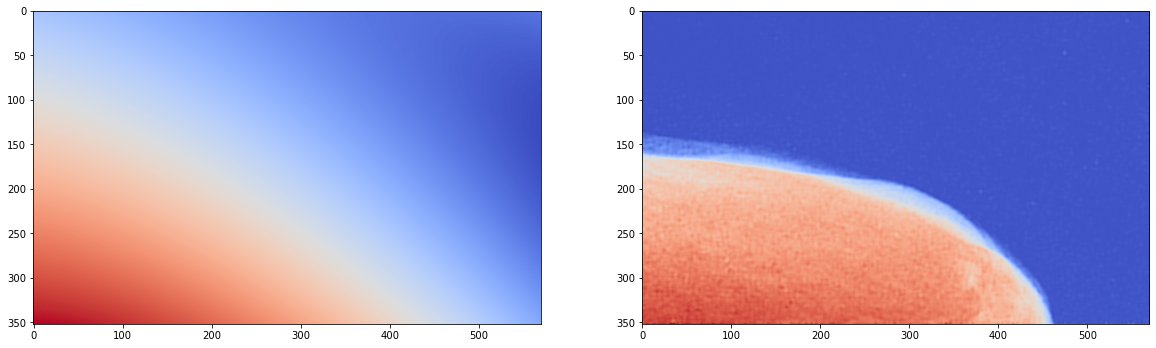

In [12]:
fig, (ax,ax1) =plt.subplots(ncols = 2, figsize = (20,12))
ax.imshow(v_pred.reshape(py,px),cmap = cmaps['Diverging'][9])
ax1.imshow(Rho_star[:,t_0].reshape(py,px),cmap = cmaps['Diverging'][9])
plt.show()


In [32]:
list_rho_pred = []
list_u_pred =  []
list_v_pred = []
list_p_pred =  []

for i in range(T_star.shape[1]):
    t_test = T_star[:,i].flatten().reshape(-1,1)
    x_test = X_star[:,i].flatten().reshape(-1,1)
    y_test = Y_star[:,i].flatten().reshape(-1,1)
    X= np.concatenate([x_test,y_test,t_test],1)
    pred = mod.predict_step(X,5000)
    [rho_pred,u_pred,v_pred,p_pred]=pred
    list_rho_pred.append(rho_pred)
    list_u_pred.append(u_pred)
    list_v_pred.append(v_pred)
    list_p_pred.append(p_pred)


py,px = data['pixel_xy'][0,0],data['pixel_xy'][0,1]


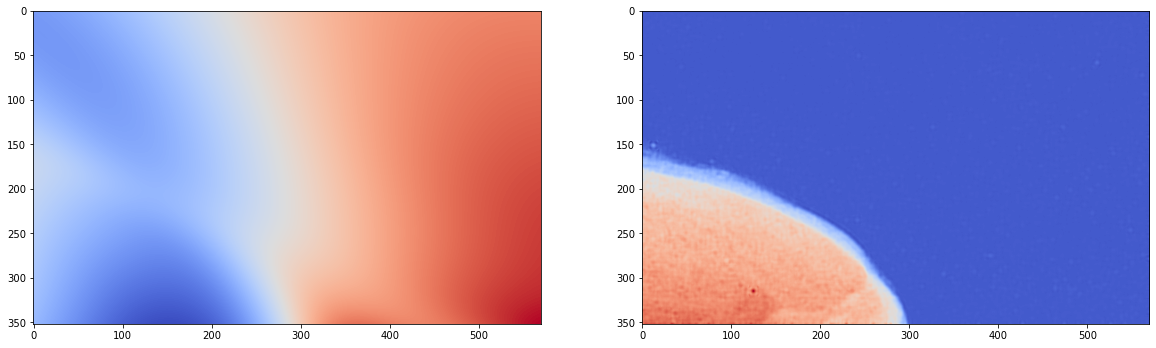

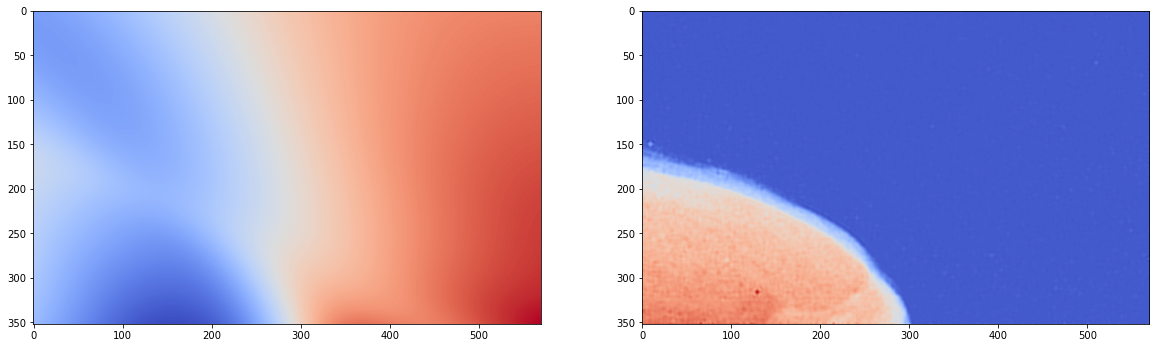

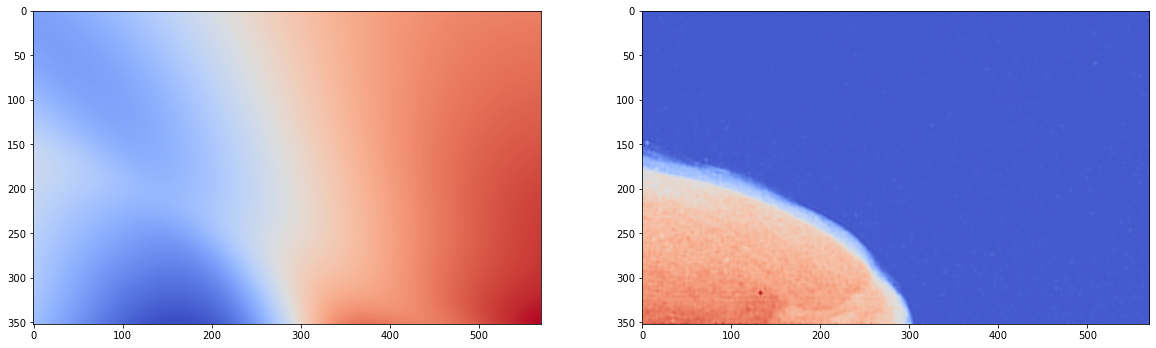

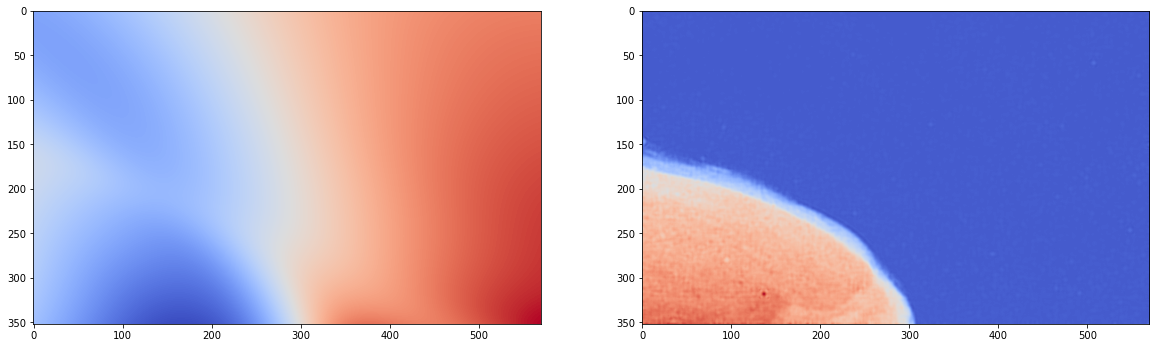

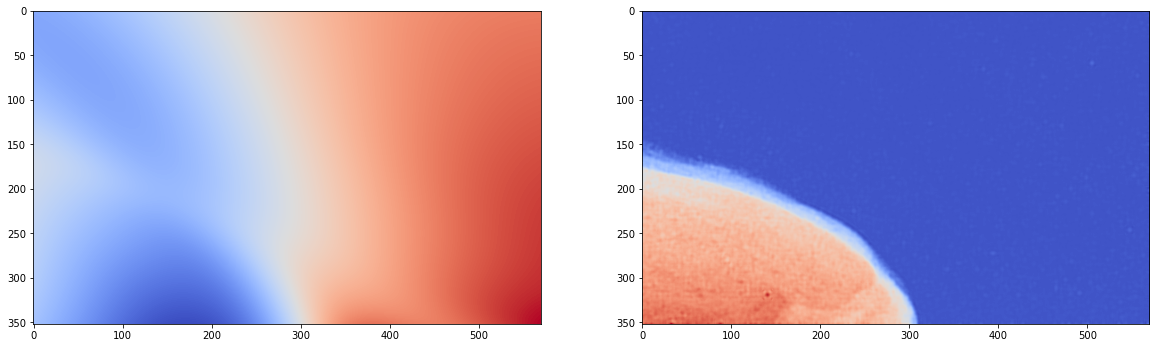

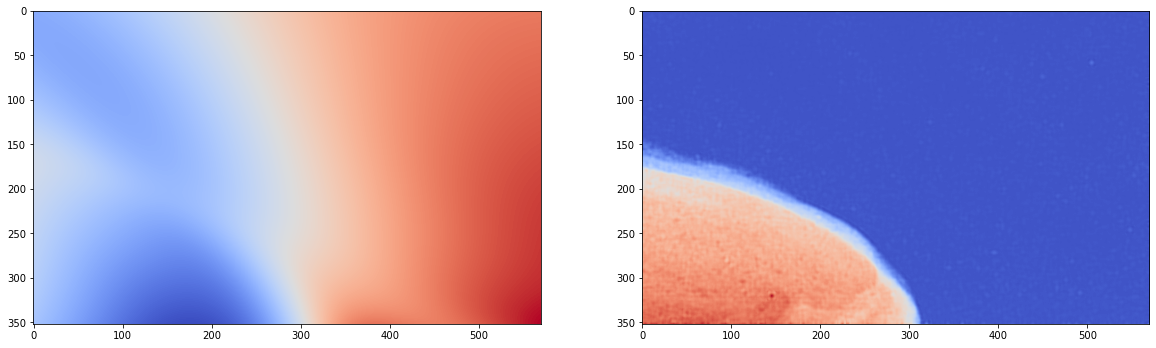

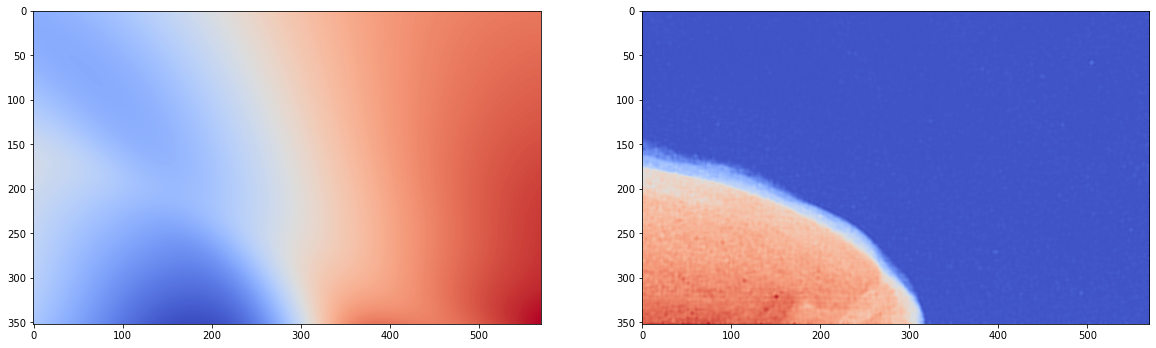

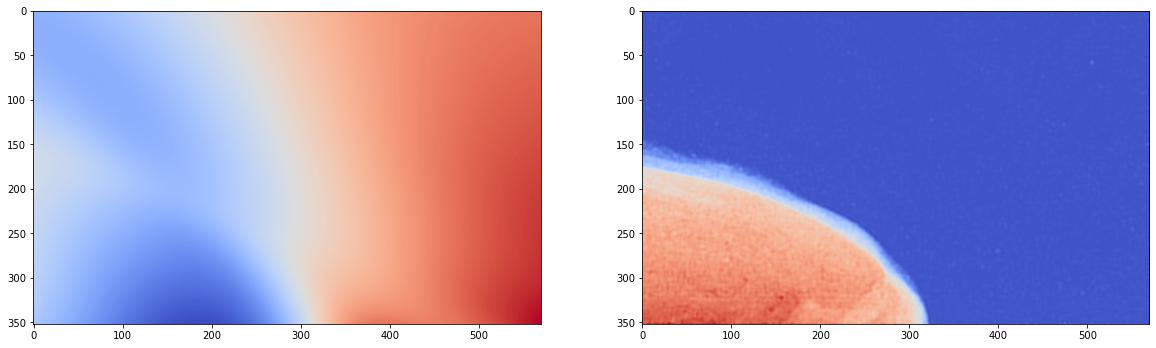

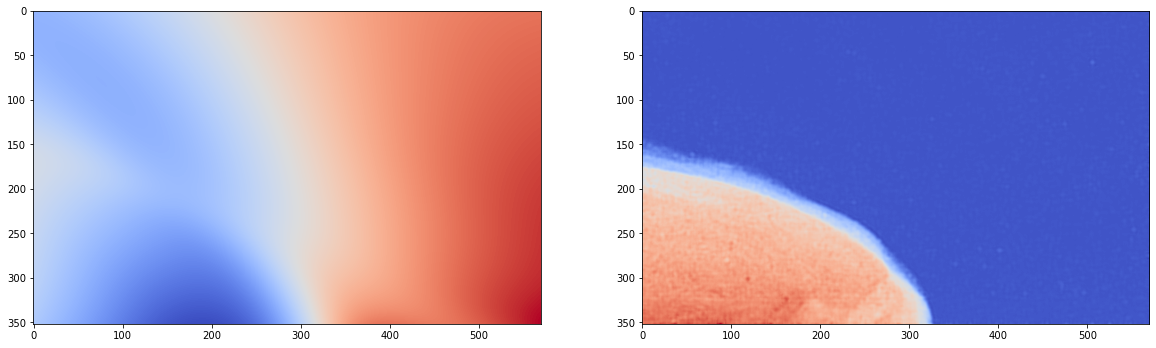

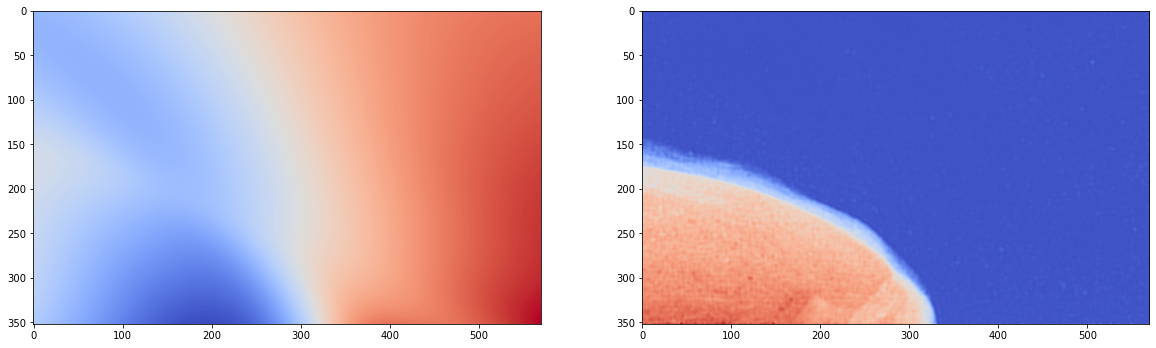

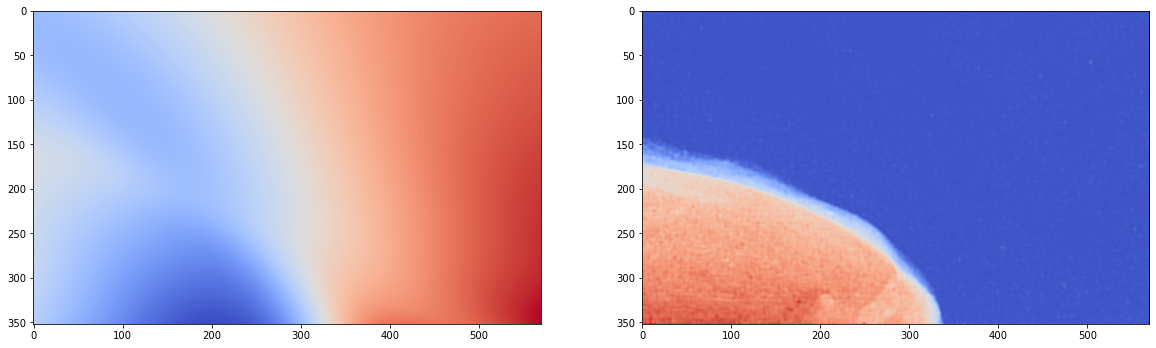

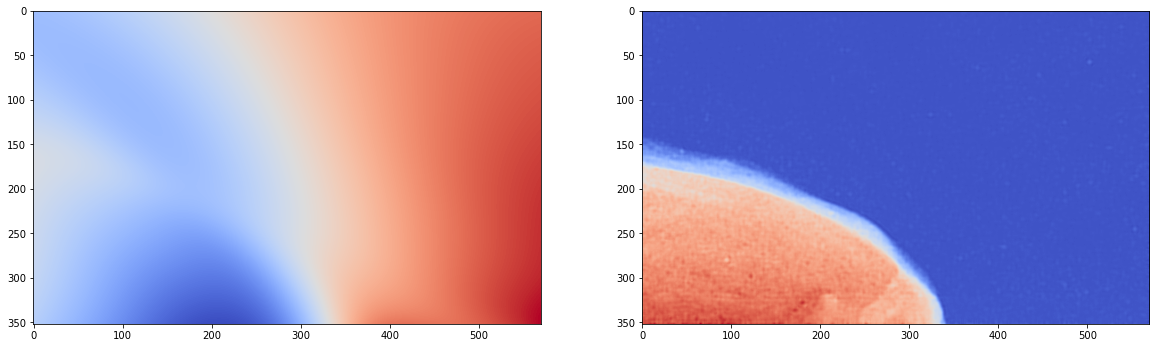

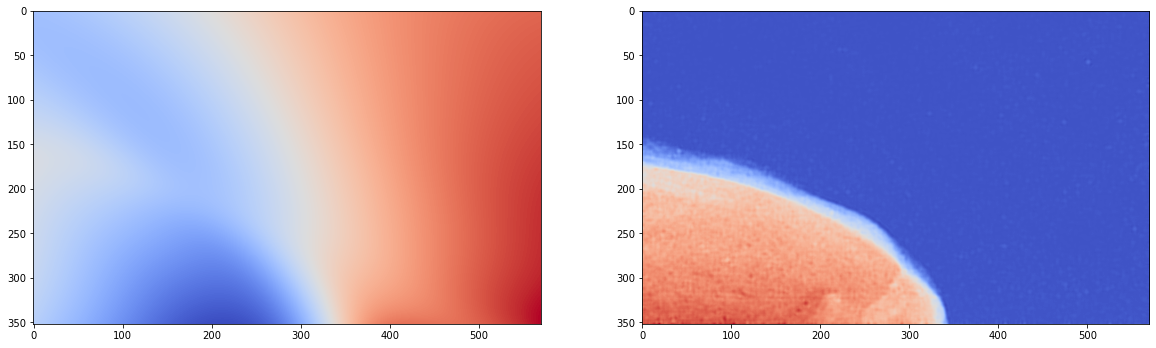

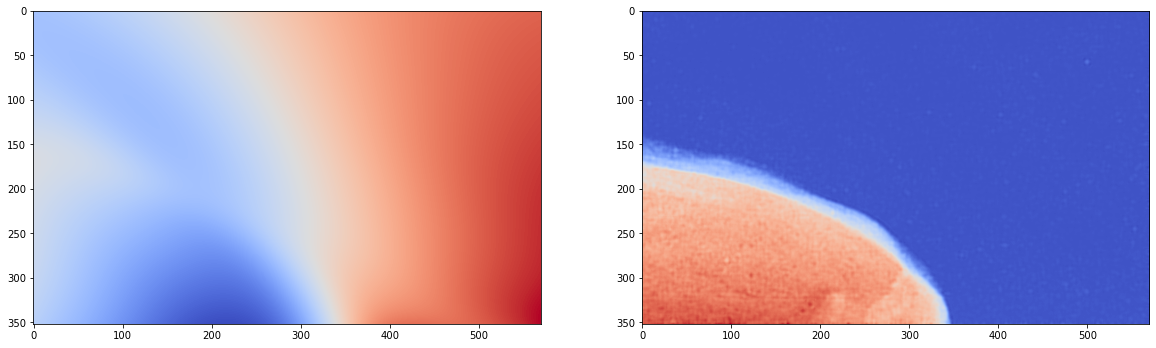

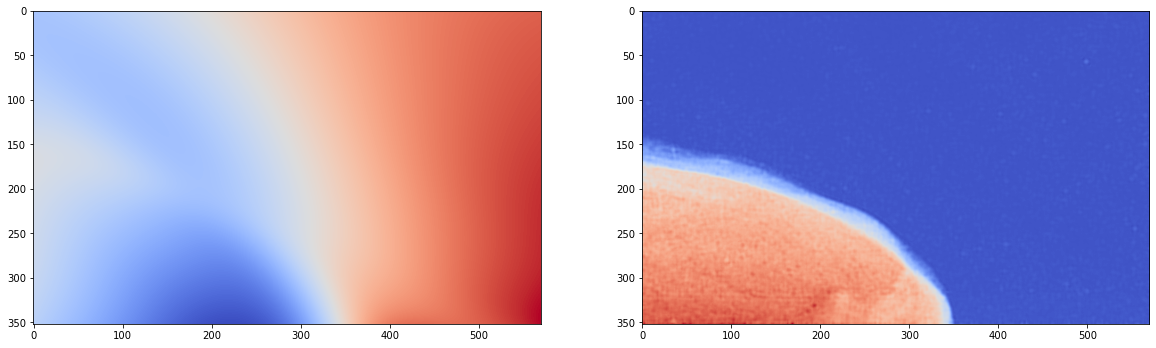

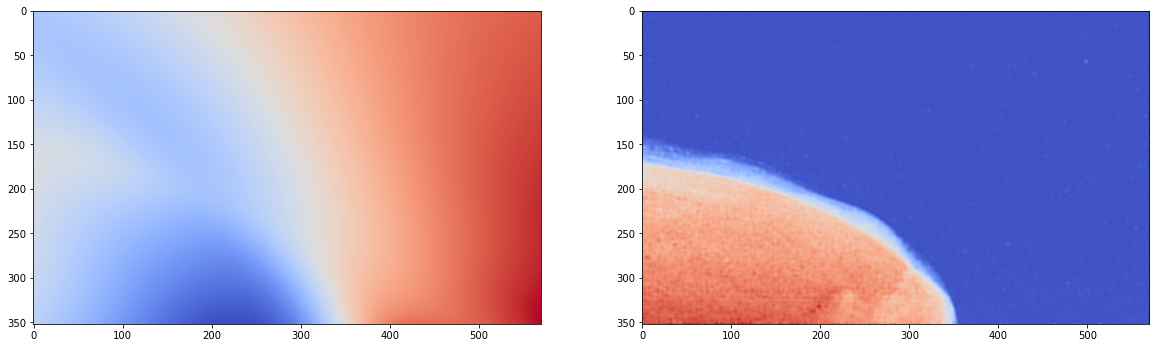

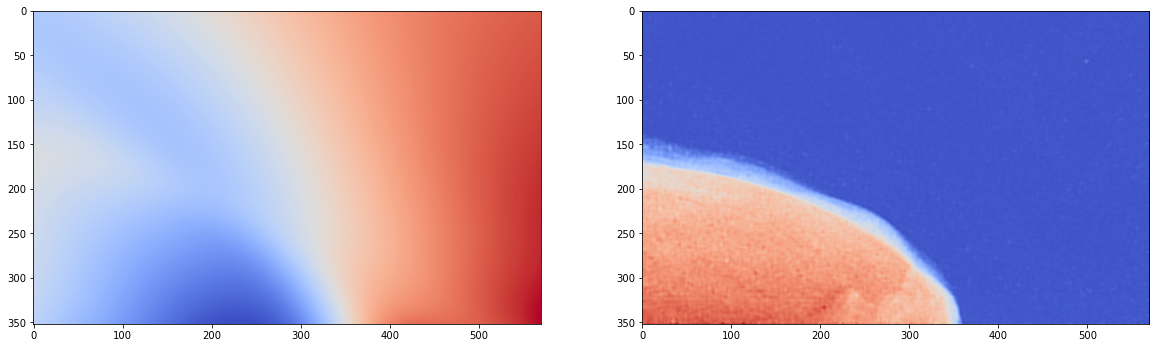

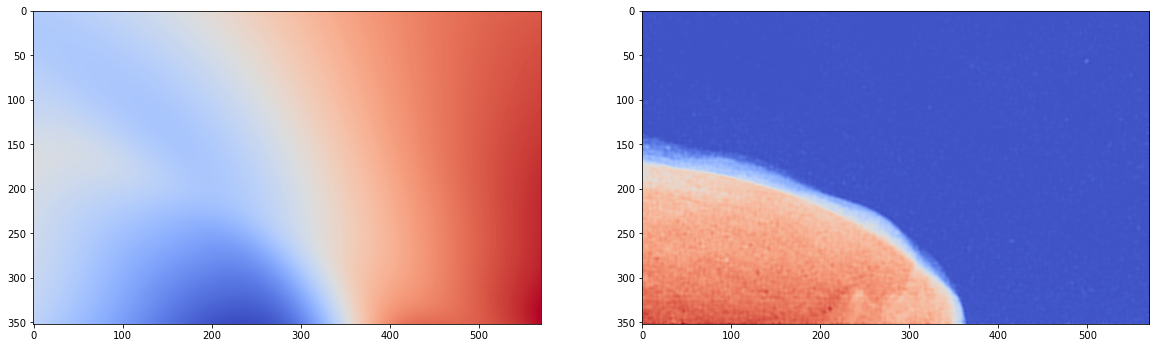

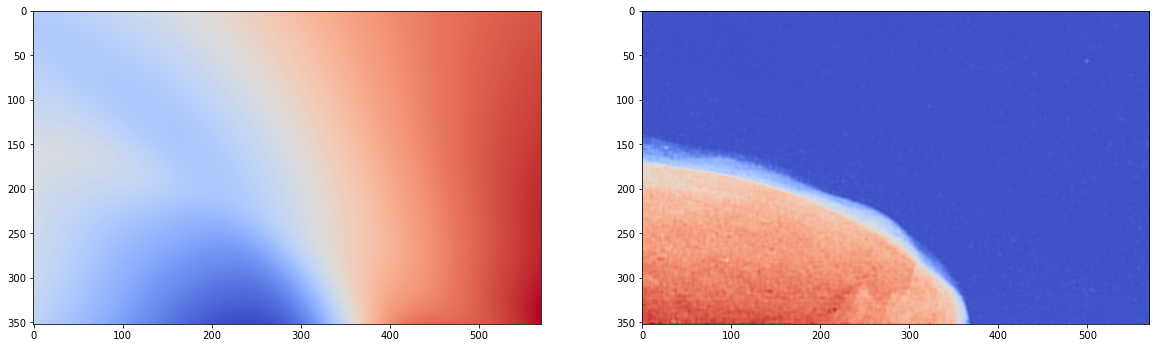

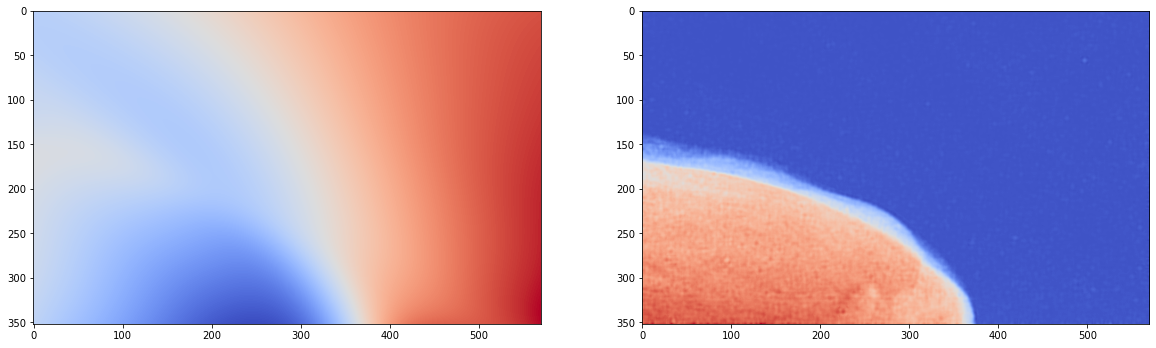

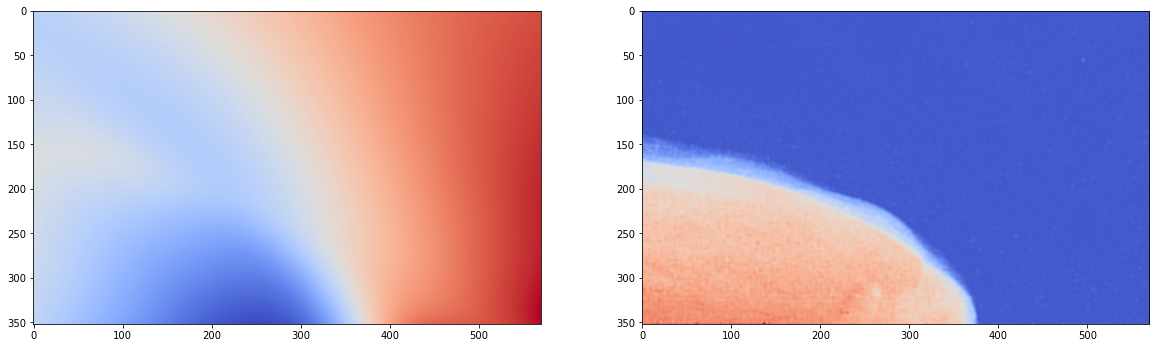

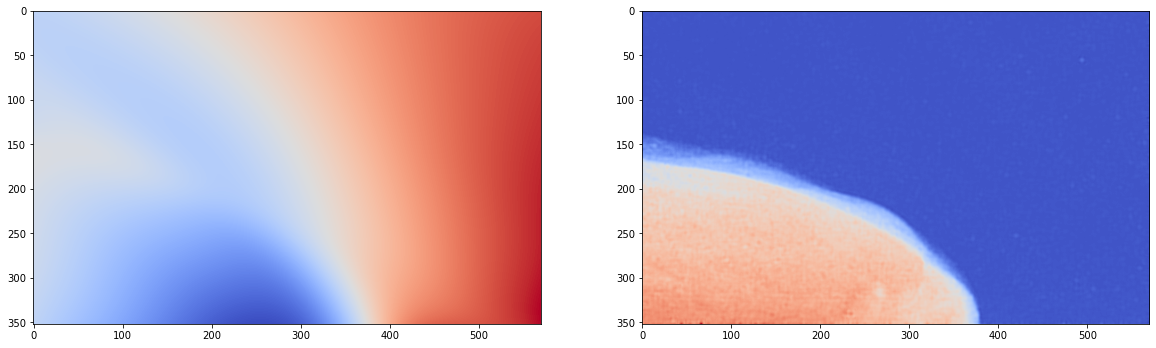

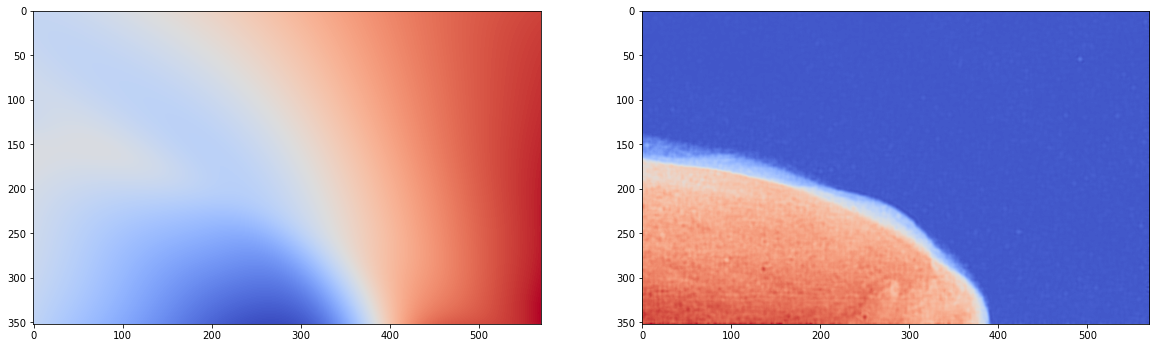

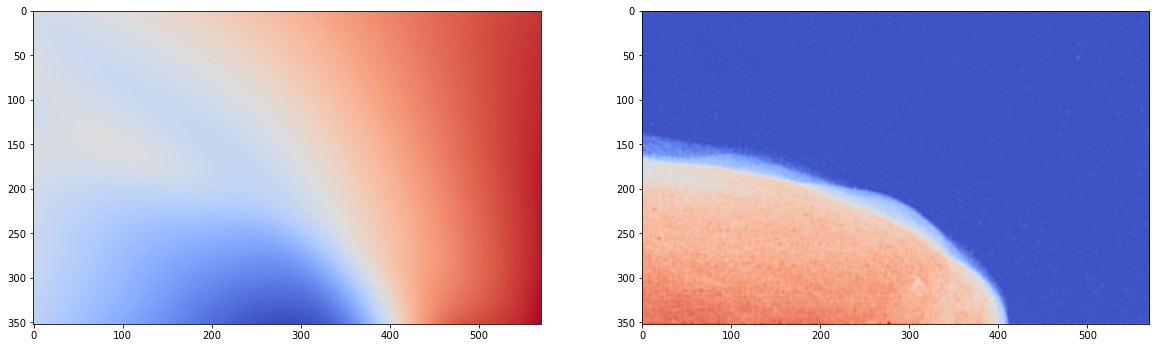

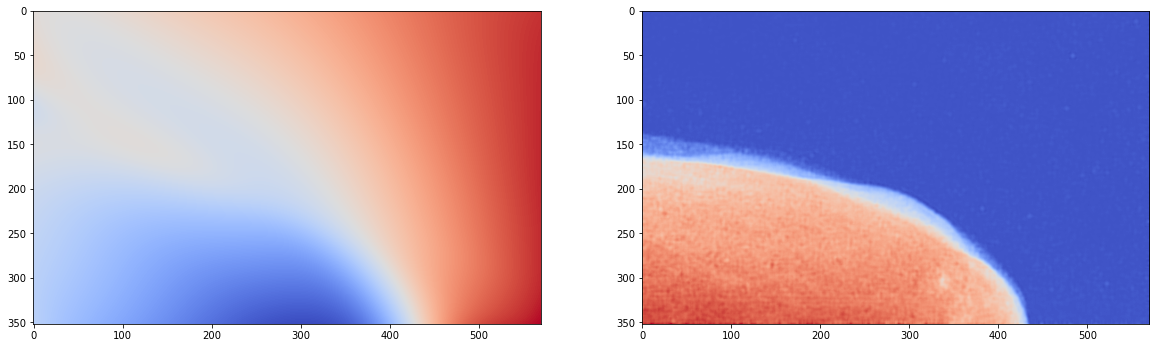

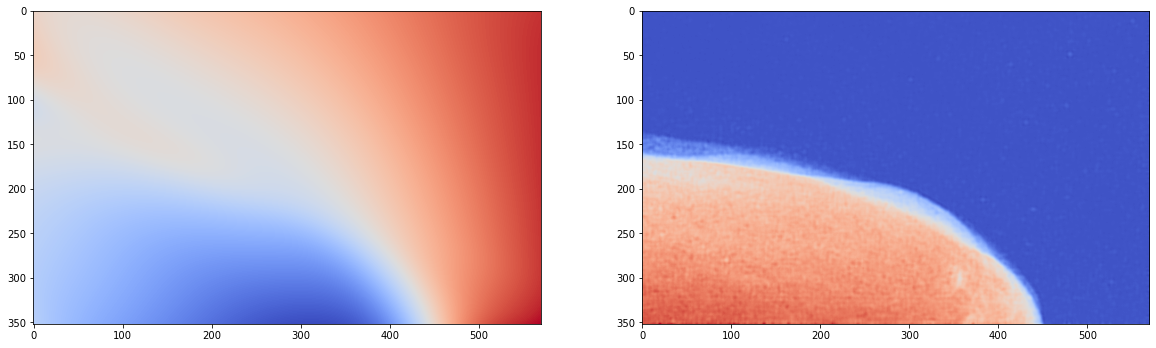

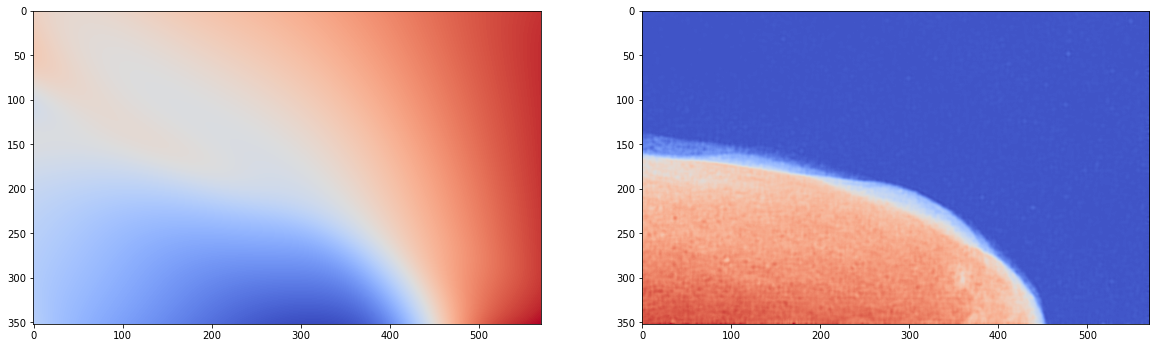

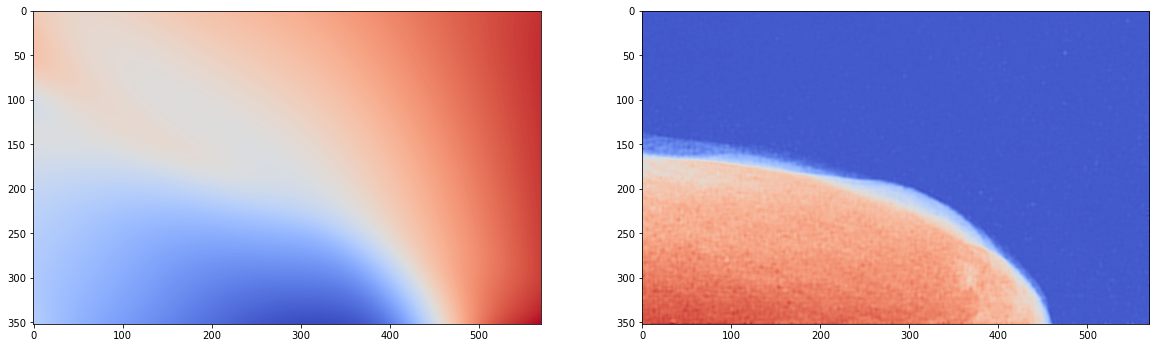

In [37]:
for i in range(150,T_star.shape[1],2):
    fig, (ax,ax1) =plt.subplots(ncols = 2, figsize = (20,12))
    ax.imshow(list_v_pred[i].reshape(py,px),cmap = cmaps['Diverging'][9])
    ax1.imshow(Rho_star[:,i].reshape(py,px),cmap = cmaps['Diverging'][9])
    plt.show()
